In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
# figure root
fig_root = '../figures'
save_fig = True

In [3]:
e3sm_sst_dataH = np.load('e3sm_sst_historical.npz')
e3sm_sst_dataP = np.load('e3sm_sst_ssp585.npz')
e3sm_amoc_dataH = np.load('e3sm_amoc26_historical.npz')
e3sm_amoc_dataP = np.load('e3sm_amoc26_ssp585.npz')
e3sm_time = np.concatenate((e3sm_amoc_dataH['time'], e3sm_amoc_dataP['time']))
e3sm_sst = np.concatenate((e3sm_sst_dataH['data'], e3sm_sst_dataP['data']), axis=1)
e3sm_amoc = np.concatenate((e3sm_amoc_dataH['data'], e3sm_amoc_dataP['data']), axis=1)
print(e3sm_sst.shape)
ne3sm = e3sm_sst.shape[0]

(8, 250)


In [4]:
esgf_sst_dataH = np.load('esgf_sst_historical.npz')
esgf_sst_dataP = np.load('esgf_sst_ssp585.npz')
esgf_sstH = esgf_sst_dataH['data']
print(esgf_sstH.shape)
esgf_sstP = esgf_sst_dataP['data']
print(esgf_sstP.shape)
esgf_timeH = esgf_sst_dataH['time']
esgf_timeP = esgf_sst_dataP['time']
esgf_sst_labelH = list(esgf_sst_dataH['label'])
esgf_sst_labelP = list(esgf_sst_dataP['label'])
sst_label = set(esgf_sst_labelH).intersection(esgf_sst_labelP)
print(len(sst_label))
sst_label_set = set([lb.split('_')[0] for lb in sst_label])
print(len(sst_label_set))
print(sst_label_set)

(279, 165)
(109, 85)
97
14
{'UKESM1-0-LL', 'CESM2', 'MPI-ESM1-2-HR', 'HadGEM3-GC31-LL', 'BCC-CSM2-MR', 'MRI-ESM2-0', 'MCM-UA-1-0', 'CanESM5', 'NorESM2-LM', 'MPI-ESM1-2-LR', 'CNRM-CM6-1', 'IPSL-CM6A-LR', 'CESM2-WACCM', 'CNRM-ESM2-1'}


In [5]:
esgf_amoc_dataH = np.load('esgf_amoc26_historical.npz')
esgf_amoc_dataP = np.load('esgf_amoc26_ssp585.npz')
esgf_amocH = esgf_amoc_dataH['data']
print(esgf_amocH.shape)
esgf_amocP = esgf_amoc_dataP['data']
print(esgf_amocP.shape)
esgf_amoc_labelH = list(esgf_amoc_dataH['label'])
esgf_amoc_labelP = list(esgf_amoc_dataP['label'])
amoc_label = set(esgf_amoc_labelH).intersection(esgf_amoc_labelP)
print(len(amoc_label))
amoc_label_set = set([lb.split('_')[0] for lb in amoc_label])
print(len(amoc_label_set))
print(amoc_label_set)

(101, 165)
(43, 85)
41
12
{'UKESM1-0-LL', 'CESM2', 'GFDL-ESM4', 'HadGEM3-GC31-LL', 'MPI-ESM1-2-HR', 'GFDL-CM4', 'MPI-ESM1-2-LR', 'INM-CM5-0', 'IPSL-CM6A-LR', 'HadGEM3-GC31-MM', 'INM-CM4-8', 'CESM2-WACCM'}


In [6]:
label_intersection = sorted(sst_label_set.intersection(amoc_label_set))
print(label_intersection)
label_union = sorted(sst_label_set.union(amoc_label_set))
print(label_union)

['CESM2', 'CESM2-WACCM', 'HadGEM3-GC31-LL', 'IPSL-CM6A-LR', 'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR', 'UKESM1-0-LL']
['BCC-CSM2-MR', 'CESM2', 'CESM2-WACCM', 'CNRM-CM6-1', 'CNRM-ESM2-1', 'CanESM5', 'GFDL-CM4', 'GFDL-ESM4', 'HadGEM3-GC31-LL', 'HadGEM3-GC31-MM', 'INM-CM4-8', 'INM-CM5-0', 'IPSL-CM6A-LR', 'MCM-UA-1-0', 'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR', 'MRI-ESM2-0', 'NorESM2-LM', 'UKESM1-0-LL']


In [7]:
#esgf_colors = np.load('cmip6_colors.npz', allow_pickle=True)['esgf_colors'].flat[0]
cmap = cm.get_cmap('rainbow')
nmodel = len(label_union)
ifrac = np.linspace(0, 1, nmodel)
esgf_colors = {}
for i in np.arange(nmodel):
    esgf_colors[label_union[i]] = cmap(ifrac[i])

esgf_colors['E3SMv1-0-full'] = 'k'
esgf_colors['E3SMv1-0-GHG'] = 'gray'

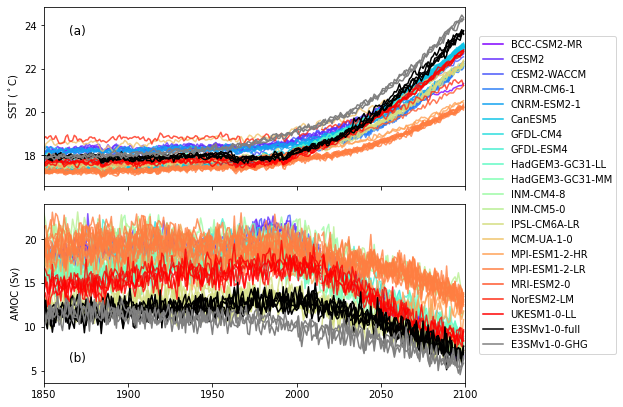

In [8]:
fig, axarr = plt.subplots(2, sharex='col')
fig.set_size_inches([9,6])
models = []
ax = axarr[0]
for lb in sorted(sst_label):
    mname = lb.split('_')[0]
    color = esgf_colors[mname]
    idx = esgf_sst_labelH.index(lb)
    ax.plot(esgf_timeH, esgf_sstH[idx,:], color=color, alpha=0.8)
    idx = esgf_sst_labelP.index(lb)
    ax.plot(esgf_timeP, esgf_sstP[idx,:], color=color, alpha=0.8)
ax.set_ylabel('SST ($^\circ$C)')  
    
ax = axarr[1]
for lb in sorted(amoc_label):
    mname = lb.split('_')[0]
    color = esgf_colors[mname]
    idx = esgf_amoc_labelH.index(lb)
    ax.plot(esgf_timeH, esgf_amocH[idx,:], color=color, alpha=0.8)
    idx = esgf_amoc_labelP.index(lb)
    ax.plot(esgf_timeP, esgf_amocP[idx,:], color=color, alpha=0.8)
ax.set_ylabel('AMOC (Sv)')

for i in np.arange(ne3sm):
    if i <= 4:
        color = 'k'
    else:
        color = 'gray'
    axarr[0].plot(e3sm_time, e3sm_sst[i,:], color=color)
    axarr[1].plot(e3sm_time, e3sm_amoc[i,:], color=color)
    
ax.set_xlim([1850,2100])

axarr[0].text(0.06, 0.9, '(a)', transform=axarr[0].transAxes, fontsize=12, color='k', va='top')
axarr[1].text(0.06, 0.1, '(b)', transform=axarr[1].transAxes, fontsize=12, color='k', va='bottom')

for key in esgf_colors.keys():
    ax.plot(np.nan, np.nan, color=esgf_colors[key], label=key)
ax.legend(loc='center left',  bbox_to_anchor=(1.02, 1.05), ncol=1)
plt.subplots_adjust(bottom = 0.08, top=0.95, left=0.09, right=0.74, hspace=0.1)

# save figure
if save_fig:
    figname = fig_root+'/CMIP6_ScenarioMIP_SST_AMOC.png'
    fig.savefig(figname, dpi = 300)

In [9]:
navg = 30
e3sm_sst_mean = np.nanmean(e3sm_sst_dataH['data'][:,-navg:], axis=1)
e3sm_sst_diff = np.nanmean(e3sm_sst_dataP['data'][:,-navg:], axis=1) - e3sm_sst_mean
print(e3sm_sst_mean)
print(e3sm_sst_diff)
e3sm_amoc_mean = np.nanmean(e3sm_amoc_dataH['data'][:,-navg:], axis=1)
e3sm_amoc_diff = np.nanmean(e3sm_amoc_dataP['data'][:,-navg:], axis=1) - e3sm_amoc_mean
print(e3sm_amoc_mean)
print(e3sm_amoc_diff)

[18.17341583 18.16413594 18.14364609 18.13475004 18.17122939 19.07202523
 19.08965891 19.14650723]
[4.31747838 4.31962375 4.43747815 4.49681456 4.42373564 4.10374145
 4.20622578 4.0827652 ]
[13.14941322 12.54628535 12.89133143 12.52287469 12.95056254 10.27478099
  9.69490014 10.21671269]
[-5.1620248  -4.58885846 -4.94027556 -4.71757153 -4.89333003 -3.8541243
 -3.28688856 -3.76542783]


In [10]:
markers = ['^', 'v', '<', '>', 'd']
nmarker = len(markers)
esgf_markers = {}
for i, lb in enumerate(label_union):
    j = i%nmarker
    esgf_markers[lb] = markers[j]
esgf_markers['E3SMv1-0-full'] = 'o'
esgf_markers['E3SMv1-0-GHG'] = 'o'
print(esgf_markers)

{'BCC-CSM2-MR': '^', 'CESM2': 'v', 'CESM2-WACCM': '<', 'CNRM-CM6-1': '>', 'CNRM-ESM2-1': 'd', 'CanESM5': '^', 'GFDL-CM4': 'v', 'GFDL-ESM4': '<', 'HadGEM3-GC31-LL': '>', 'HadGEM3-GC31-MM': 'd', 'INM-CM4-8': '^', 'INM-CM5-0': 'v', 'IPSL-CM6A-LR': '<', 'MCM-UA-1-0': '>', 'MPI-ESM1-2-HR': 'd', 'MPI-ESM1-2-LR': '^', 'MRI-ESM2-0': 'v', 'NorESM2-LM': '<', 'UKESM1-0-LL': '>', 'E3SMv1-0-full': 'o', 'E3SMv1-0-GHG': 'o'}


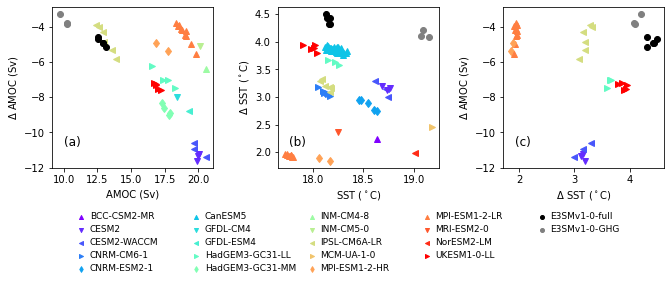

In [11]:
def set_aspect_pb(ax, ratio):
    xleft, xright = ax.get_xlim()
    ybottom, ytop = ax.get_ylim()
    ax.set_aspect(abs((xright-xleft)/(ybottom-ytop))*ratio)
    
def add_legend(axis, xloc, yloc, color, text, marker='o'):
    axis.scatter(xloc, yloc, s=16, color=color, marker=marker, transform=axis.transAxes)
    axis.text(xloc+0.015, yloc, text, fontsize=9,
              transform=axis.transAxes, color='k',
              va='center')
    
fig, axarr = plt.subplots(1,3)
fig.set_size_inches([10,5])

ax = axarr[0]
for lb in sorted(amoc_label):
    mname = lb.split('_')[0]
    idx = esgf_amoc_labelH.index(lb)
    esgf_amoc_mean = np.nanmean(esgf_amoc_dataH['data'][idx,-navg:])
    idx = esgf_amoc_labelP.index(lb)
    esgf_amoc_diff = np.nanmean(esgf_amoc_dataP['data'][idx,-navg:])-esgf_amoc_mean
    ax.plot(esgf_amoc_mean, esgf_amoc_diff, esgf_markers[mname], color=esgf_colors[mname])
ax.set_xlabel('AMOC (Sv)')
ax.set_ylabel('$\Delta$ AMOC (Sv)')

ax = axarr[1]
for lb in sorted(sst_label):
    mname = lb.split('_')[0]
    idx = esgf_sst_labelH.index(lb)
    esgf_sst_mean = np.nanmean(esgf_sst_dataH['data'][idx,-navg:])
    idx = esgf_sst_labelP.index(lb)
    esgf_sst_diff = np.nanmean(esgf_sst_dataP['data'][idx,-navg:])-esgf_sst_mean
    ax.plot(esgf_sst_mean, esgf_sst_diff, esgf_markers[mname], color=esgf_colors[mname])
ax.set_xlabel('SST ($^\circ$C)')
ax.set_ylabel('$\Delta$ SST ($^\circ$C)')

ax = axarr[2]
lbintersection = amoc_label.intersection(sst_label)
for lb in lbintersection:
    mname = lb.split('_')[0]
    idx = esgf_sst_labelH.index(lb)
    esgf_sst_mean = np.nanmean(esgf_sst_dataH['data'][idx,-navg:])
    idx = esgf_sst_labelP.index(lb)
    esgf_sst_diff = np.nanmean(esgf_sst_dataP['data'][idx,-navg:])-esgf_sst_mean
    idx = esgf_amoc_labelH.index(lb)
    esgf_amoc_mean = np.nanmean(esgf_amoc_dataH['data'][idx,-navg:])
    idx = esgf_amoc_labelP.index(lb)
    esgf_amoc_diff = np.nanmean(esgf_amoc_dataP['data'][idx,-navg:])-esgf_amoc_mean
    ax.plot(esgf_sst_diff, esgf_amoc_diff, esgf_markers[mname], color=esgf_colors[mname])

ax.set_xlabel('$\Delta$ SST ($^\circ$C)')
ax.set_ylabel('$\Delta$ AMOC (Sv)')

for i in np.arange(ne3sm):
    if i <= 4:
        color = 'k'
    else:
        color = 'gray'
    axarr[0].plot(e3sm_amoc_mean[i], e3sm_amoc_diff[i], color=color, marker='o')
    axarr[1].plot(e3sm_sst_mean[i],  e3sm_sst_diff[i],  color=color, marker='o')
    axarr[2].plot(e3sm_sst_diff[i],  e3sm_amoc_diff[i],  color=color, marker='o')

for i in np.arange(3):
    set_aspect_pb(axarr[i], 1.0)

axarr[0].text(0.07, 0.12, '(a)', transform=axarr[0].transAxes, fontsize=12, color='k', va='bottom')
axarr[1].text(0.07, 0.12, '(b)', transform=axarr[1].transAxes, fontsize=12, color='k', va='bottom')
axarr[2].text(0.07, 0.12, '(c)', transform=axarr[2].transAxes, fontsize=12, color='k', va='bottom')

plt.tight_layout()

# plot legend
# x- and y-labels
plt.subplots_adjust(left=0.1, right=0.95, bottom=0.2, top=0.96, wspace=0.4, hspace=0.1)
ax = fig.add_axes([0.1,0.05,0.8,0.18])
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
ax.axes.get_yaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)
legend_labels = list(esgf_colors.keys())
legend_colors = esgf_colors

ncol = 5
nlg = len(legend_labels)
nrow = int(np.ceil(nlg/ncol))
dx = 1/ncol
dy = 1/nrow
for i, lb in enumerate(legend_labels):
    if i >= 19:
        j = i+1
    else:
        j = i
    icol = j//nrow
    irow = j%nrow
    x = dx*icol + 0.05
    y = 0.95-dy*irow
#     print('{}, {}: {}, {}'.format(icol, irow, x, y))
    marker = esgf_markers[lb]
    add_legend(ax, x, y, legend_colors[lb], legend_labels[i], marker=marker)
    
# save figure
if save_fig:
    figname = fig_root+'/CMIP6_ScenarioMIP_Scatter_AMOC_SST.png'
    fig.savefig(figname, dpi = 300)